**OpenAI Chat Bot Base**

In [37]:
import openai

# Set your OpenAI API key
openai.api_key = ""

def chatbot(prompt):
    try:
        # Send the user's input to the OpenAI API
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",  # Use the latest and most cost-effective model
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.7,  # Adjust creativity level
            max_tokens=500    # Limit the response length
        )
        # Extract and return the response
        return response['choices'][0]['message']['content']
    except Exception as e:
        return f"Error: {e}"

# Main loop for the chatbot
if __name__ == "__main__":
    print("Chatbot is running! Type 'exit' to stop.")
    while True:
        user_input = "Exit"
        if user_input.lower() == "exit":
            print("Goodbye!")
            break
        response = chatbot(user_input)
        print(f"Bot: {response}")


Chatbot is running! Type 'exit' to stop.
Goodbye!


**USACO 2024 US Open Contest, Platinum - Problem 3. Activating Robots**

*Result from ChatGPT*

In [21]:
def compute_minimum_time(L, R, N, K, activation_points):
    # Sort activation points for easier traversal
    activation_points.sort()
    # Desired spacing between robots
    segment_length = L // R
    # Calculate target positions for R robots
    target_positions = [(i * segment_length) % L for i in range(R)]
    target_positions.sort()

    min_time = float('inf')

    for start_point in activation_points:
        # Time to reach the activation point
        travel_time = min(start_point, L - start_point)  # Minimum clockwise/counterclockwise

        # Simulate robots moving
        max_wait_time = 0
        for i, target in enumerate(target_positions):
            # Calculate when the robot from this point would align
            relative_position = (start_point + i * segment_length) % L
            wait_time = (target - relative_position) % L
            max_wait_time = max(max_wait_time, wait_time * K)

        # Total time is travel + alignment wait
        total_time = travel_time + max_wait_time
        min_time = min(min_time, total_time)

    return min_time

*ChatGPT result test*

In [22]:
def test_cases():
    test_data = [
        ("10 2 1 2\n6", 22),
        ("10 2 1 2\n7", 4),
        ("32 4 5 2\n0 23 12 5 11", 48),
        ("24 3 1 2\n16", 48),
    ]

    failed_tests = 0

    for i, (input_data, expected_output) in enumerate(test_data, start=1):
        print(f"Test Case {i}:")
        print(f"Input:\n{input_data}")
        print("Expected Output:", expected_output)

        try:
            input_lines = input_data.split("\n")
            L, R, N, K = map(int, input_lines[0].split())
            activation_points = list(map(int, input_lines[1].split()))

            result = compute_minimum_time(L, R, N, K, activation_points)
            print("Output:", result)

            if result == expected_output:
                print("Test Case Passed!\n")
            else:
                print("Test Case Failed!")
                print(f"Reason: Expected {expected_output}, but got {result}.\n")
                failed_tests += 1

        except Exception as e:
            print("Test Case Failed!")
            print(f"Error: {e}\n")
            failed_tests += 1

    print(f"Testing Complete: {len(test_data)} cases run, {failed_tests} failed.\n")

test_cases()

Test Case 1:
Input:
10 2 1 2
6
Expected Output: 22
Output: 12
Test Case Failed!
Reason: Expected 22, but got 12.

Test Case 2:
Input:
10 2 1 2
7
Expected Output: 4
Output: 9
Test Case Failed!
Reason: Expected 4, but got 9.

Test Case 3:
Input:
32 4 5 2
0 23 12 5 11
Expected Output: 48
Output: 0
Test Case Failed!
Reason: Expected 48, but got 0.

Test Case 4:
Input:
24 3 1 2
16
Expected Output: 48
Output: 24
Test Case Failed!
Reason: Expected 48, but got 24.

Testing Complete: 4 cases run, 4 failed.



*Result from AgentGPT*

In [23]:
def min_time_to_place_robots(L, R, N, K, activation_points):
    # Sort activation points for easier calculation
    activation_points.sort()

    # Calculate the distance between each robot
    distance_between_robots = L // R

    # Initialize the minimum time to a large value
    min_time = float('inf')

    # Function to calculate the time to reach a point
    def time_to_reach(start, end):
        return min(abs(end - start), L - abs(end - start))

    # Iterate over each activation point
    for point in activation_points:
        # Time to reach the activation point
        time_to_point = time_to_reach(0, point)

        # Calculate the position of the initial robot after reaching the point
        initial_robot_position = (time_to_point * K) % L

        # Calculate the time to wait for the initial robot to reach the correct position
        wait_time = (distance_between_robots - initial_robot_position) % distance_between_robots

        # Total time is the sum of time to reach the point and the wait time
        total_time = time_to_point + wait_time * K

        # Update the minimum time
        min_time = min(min_time, total_time)

    return min_time

*AgentGPT result test*

In [24]:
def test_min_time_to_place_robots():
    test_cases = [
        ((10, 2, 1, 2, [6]), 22),
        ((10, 2, 1, 2, [7]), 4),
        ((32, 4, 5, 2, [0, 23, 12, 5, 11]), 48),
        ((24, 3, 1, 2, [16]), 48)
    ]

    failed_tests = 0

    for i, (inputs, expected) in enumerate(test_cases):
        L, R, N, K, activation_points = inputs
        result = min_time_to_place_robots(L, R, N, K, activation_points)
        if result != expected:
            print(f"Test case {i+1} failed: expected {expected}, got {result}")
            failed_tests += 1
        else:
            print(f"Test case {i+1} passed!")

    print(f"\nTesting complete: {len(test_cases)} cases run, {failed_tests} failed.")

test_min_time_to_place_robots()

Test case 1 failed: expected 22, got 8
Test case 2 failed: expected 4, got 11
Test case 3 failed: expected 48, got 0
Test case 4 failed: expected 48, got 8

Testing complete: 4 cases run, 4 failed.


*Compare the performance of two GenAI models*

In [25]:
import time

def performance_comparison():
    test_data = [
        ("10 2 1 2\n6", 22),
        ("10 2 1 2\n7", 4),
        ("32 4 5 2\n0 23 12 5 11", 48),
        ("24 3 1 2\n16", 48),
    ]

    def parse_input(input_data):
        input_lines = input_data.split("\n")
        L, R, N, K = map(int, input_lines[0].split())
        activation_points = list(map(int, input_lines[1].split()))
        return L, R, N, K, activation_points

    print("Performance Comparison:\n")
    for i, (input_data, expected_output) in enumerate(test_data, start=1):
        print(f"Test Case {i}:")
        print(f"Input:\n{input_data}")
        print("Expected Output:", expected_output)

        L, R, N, K, activation_points = parse_input(input_data)

        start_time = time.time()
        result_1 = compute_minimum_time(L, R, N, K, activation_points)
        time_1 = time.time() - start_time

        start_time = time.time()
        result_2 = min_time_to_place_robots(L, R, N, K, activation_points)
        time_2 = time.time() - start_time

        print(f"ChatGPT: Result = {result_1}, Time = {time_1:.6f} seconds")
        print(f"AgentGPT: Result = {result_2}, Time = {time_2:.6f} seconds")

        if result_1 != expected_output:
            print("ChatGPT: FAILED")
        if result_2 != expected_output:
            print("AgentGPT: FAILED")

        if time_1 < time_2:
            print("ChatGPT is faster\n")
        elif time_1 > time_2:
            print("AgentGPT is faster\n")
        else:
            print("Both GenAI have similar performance\n")

performance_comparison()

Performance Comparison:

Test Case 1:
Input:
10 2 1 2
6
Expected Output: 22
ChatGPT: Result = 12, Time = 0.000018 seconds
AgentGPT: Result = 8, Time = 0.000007 seconds
ChatGPT: FAILED
AgentGPT: FAILED
AgentGPT is faster

Test Case 2:
Input:
10 2 1 2
7
Expected Output: 4
ChatGPT: Result = 9, Time = 0.000019 seconds
AgentGPT: Result = 11, Time = 0.000006 seconds
ChatGPT: FAILED
AgentGPT: FAILED
AgentGPT is faster

Test Case 3:
Input:
32 4 5 2
0 23 12 5 11
Expected Output: 48
ChatGPT: Result = 0, Time = 0.000034 seconds
AgentGPT: Result = 0, Time = 0.000013 seconds
ChatGPT: FAILED
AgentGPT: FAILED
AgentGPT is faster

Test Case 4:
Input:
24 3 1 2
16
Expected Output: 48
ChatGPT: Result = 24, Time = 0.000008 seconds
AgentGPT: Result = 8, Time = 0.000004 seconds
ChatGPT: FAILED
AgentGPT: FAILED
AgentGPT is faster



*Plot the performance of the GenAI models*

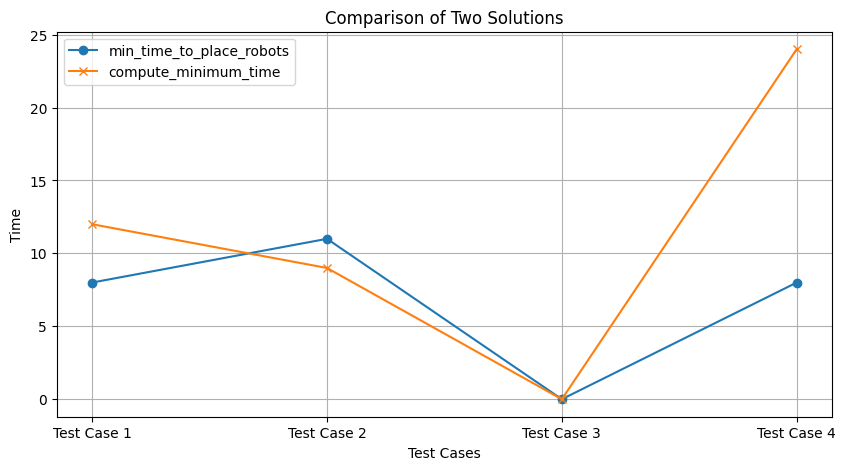

In [26]:
import matplotlib.pyplot as plt

def compare_solutions():
    test_cases = [
        (10, 2, 1, 2, [6]),
        (10, 2, 1, 2, [7]),
        (32, 4, 5, 2, [0, 23, 12, 5, 11]),
        (24, 3, 1, 2, [16])
    ]

    results_1 = []
    results_2 = []

    for L, R, N, K, activation_points in test_cases:
        result_1 = min_time_to_place_robots(L, R, N, K, activation_points)
        result_2 = compute_minimum_time(L, R, N, K, activation_points)
        results_1.append(result_1)
        results_2.append(result_2)

    return results_1, results_2

def plot_results(results_1, results_2):
    test_case_labels = ['Test Case 1', 'Test Case 2', 'Test Case 3', 'Test Case 4']
    x = range(len(test_case_labels))

    plt.figure(figsize=(10, 5))
    plt.plot(x, results_1, label='min_time_to_place_robots', marker='o')
    plt.plot(x, results_2, label='compute_minimum_time', marker='x')
    plt.xticks(x, test_case_labels)
    plt.xlabel('Test Cases')
    plt.ylabel('Time')
    plt.title('Comparison of Two Solutions')
    plt.legend()
    plt.grid(True)
    plt.show()

results_1, results_2 = compare_solutions()
plot_results(results_1, results_2)